### batch gradient descent
- In Batch gradient descent
  - we go through all training samples and calculate cummulative error
- if i have 10 million samples 
  - to find cumulative error for first round(epoch) now we need to do a forward pass for 10 million samples
  - we have 2 features(Area and bedroom). This requires finding 20 million derivatives
 -now we backpropogate and adjust weights
 


### stochastic Gradient Descent

 - 1.instead of going through all sample go to one randomly pick data training sample find out the error and after first sample
 - 2.you start adjusting the weights
   - w1=w1-learning rate*d(error)/d(w1) 
   - w2=w2-learning rate*d(error)/d(W2)
   - b=b-learning rate*d(error)/d(bias)
 - 3.Again randomly pick a training sample
     - then find out the error
 - 4 again adjust weights
 - so, you adjust weight after every training sample forward pass this is called stochastic graadient descent
 


### Diffeance between Batch Gradient descent and Stochastic Gradient Descent(SGD)

- Batch Gradient Descent
  - Use all training samples for one forward pass and then adjust weights
  - Good for small training set
- Stochastic Gradient Descent
  - use one (randomly picked)sample for a  forward pass and then adjust weights
  - Good when training set is very big and we don't want too much computation

### mini batch gradient
- now what is mini batch gradient
  - Mini Batch is like SGD. Instead of choosing one randomly picked training sample, you will use a batch of randomly picked training samples. 
   - 1. for example I have 20 training samples total.
   - 2. Let's say I use 5 random samples for one forward pass to calculate cummulative error
   - 3. After that I adjust weights
   

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
1,2600,4,120.0
5,1170,2,38.0
10,1800,3,82.0
3,1521,3,75.0


In [3]:
#scaling the independent variable
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x=sx.fit_transform(df.drop('price',axis='columns'))


In [4]:
scaled_x
df['price'].shape

(20,)

In [6]:
# scaled_y=sy.fit_transform(df[['price']])
#scaled prices that is dependent variable
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))#reshaping the price bcz fit and tramsform method expect 2d array
scaled_y

(20, 1)

# implementation of batch descent from scratch

In [6]:
# print(scaled_x.shape[1])
# print(np.ones(shape=(number_of_features)))

In [7]:
scaled_x


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
#batch_gradient _descent function will take argument as x, y, no of epoch and learning rate
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    #initiasialise weights as an array of ones
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features))# so we will give you w1=1 and w2=1
    bias=0
    #calculating the total no of sample in the input data
    total_sample=x.shape[0]
    
    #created empty lists to store the cost and epochs values
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        #so, y_predicted=w1*area+w2*bedrooms+bias so, in next line we will implement this
        #calculating the predicted value using current weihts and bias
        y_predicted=np.dot(w,scaled_x.T)+bias
        
        #calculate the gradient of weight and bias
        w_grad = -(2/total_sample)* (x.T.dot(y_true-y_predicted))
        b_grad= -(2/total_sample)*np.sum(y_true-y_predicted)
        #Update the weights and bias using gradient and learning rate
        w=w-learning_rate*w_grad
        b=bias-learning_rate*b_grad
        
        #calculating the cost using mean square error
        cost=np.mean(np.square(y_true-y_predicted))
        
        #Append the cost and epochs values to their respective lists
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    #return the final weights.bias,cost, and the cost and epoch        
    return w,b,cost,cost_list,epoch_list
#call the function with the scaled input and output data and specified parameter
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

        
        
    
    

(array([0.58391186, 0.37901352]), -0.0007735672117181209, 0.008501492548236428)

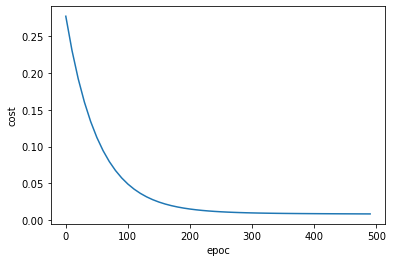

In [9]:
plt.xlabel("epoc")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [10]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    print(scaled_x.shape)
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)
    


(2,)


C:\Users\ronak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


119.19847463385561

In [11]:
predict(1000,2,w,b)

(2,)


C:\Users\ronak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


50.123695618313185

In [12]:
import random
def stochastic_gradient_Descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    #numpy array with 1 row and columns equal to number of features.
    #In our case number_of_features=3 (area,bedroom )
    w=np.ones(shape=(number_of_features))
    b=0
    
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.square(sample_y-y_predicted)
        
        if i%100 == 0:# at every 100th iteration record the cost and epoch time
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_Descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),8000)
w_sgd,b_sgd,cost_sgd

(array([0.7252363 , 0.69479629]), -0.2498026762784204, 0.0036485517466510915)

In [13]:
w,b,cost

(array([0.58391186, 0.37901352]), -0.0007735672117181209, 0.008501492548236428)

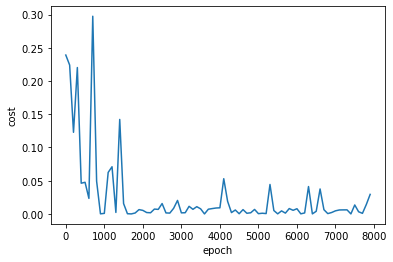

In [14]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [15]:
predict(2600,4,w_sgd,b_sgd)

(2,)


C:\Users\ronak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


129.39456359962324

In [16]:
df.sample(5)

,area,bedrooms,price
6,2732,4,135.0
19,800,1,32.0
2,1440,3,62.0
8,1310,3,50.0
13,1100,2,40.0


In [17]:
scaled_y.shape

(20, 1)

In [18]:
scaled_x.shape

(20, 2)

### mini batch gradient descent

In [19]:
np.random.permutation(20)

array([12,  2, 16, 19, 13, 11, 15,  3,  0,  7, 10,  6, 18, 17,  4,  5,  1,
        8,  9, 14])

In [26]:
scaled_x.shape[1]

2

In [28]:
def mini_batch_gradient_descent(X,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    number_of_feature=X.shape[1]
    w=np.ones(shape=(number_of_feature))
    b=0
    total_sample=X.shape[0]#no of rows in x
    if batch_size>total_sample:#in this case mini batch become same as batch gradient descent
        batch_size=total_sample
    cost_list_mini=[]
    epoch_list_mini=[]

    num_batches=int(total_sample/batch_size)
    
    for i in range(epochs):
        random_indices=np.random.permutation(total_sample)#it will print the random permutation between 0 to total_sample-1
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]
        
        for j in range(0,total_sample,batch_size):
            Xj=X_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_prdicted=np.dot(w,Xj.T)+ b
            
            w_grd=-(2/len(Xj))*(Xj.T.dot(yj-y_prdicted))
            b_grd=-(2/len(Xj))*np.sum(yj-y_prdicted)
            
            w=w-learning_rate*w_grd
            b=b-learning_rate*b_grd
            
            cost=np.mean(np.square(yj-y_prdicted))#mean square error
            
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list=mini_batch_gradient_descent(scaled_x,
                                                        scaled_y.reshape(scaled_y.shape[0],),
                                                         epochs=120,batch_size=5)
w,b,cost
            

(array([0.71019286, 0.6781282 ]), -0.23341704519323483, 0.005051330001110485)

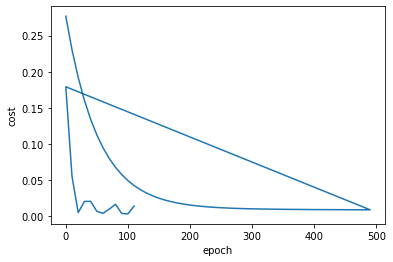

In [29]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)